In [1]:
import sys
sys.path.insert(0, 'base')
from planet_ruler import LimbObservation

In [2]:
from abcpy.backends import BackendSpark
import pyspark
sc = pyspark.SparkContext()
sc.addPyFile('utils/geometry.py')
sc.addPyFile('utils/fit.py')
sc.addPyFile('base/planet_ruler.py')

backend = BackendSpark(sc, parallelism=4)

22/05/01 12:54:07 WARN Utils: Your hostname, Mac-mini.local resolves to a loopback address: 127.0.0.1; using 192.168.0.16 instead (on interface en1)
22/05/01 12:54:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/01 12:54:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
Obs = LimbObservation('demo/iss064e002941.jpg')

In [4]:
Obs.restrict_image(xmin=2000, xmax=4000, ymin=1300, ymax=1900)

In [5]:
Obs.detect_limb(window_length=301, polyorder=2, deriv=1)

/Users/banderson/Projects/bogs/planet-ruler/utils/image.py:19: RuntimeWarning: divide by zero encountered in log10
  grad = np.log10(grad)


In [6]:
Obs.smooth_limb(method='moving-mean', window_length=20, polyorder=0)

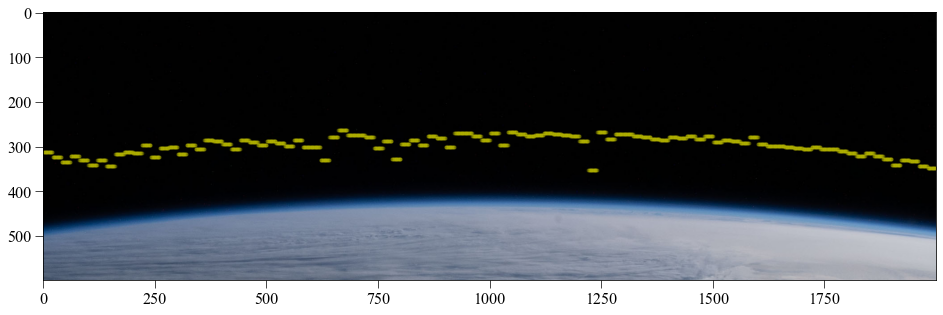

In [7]:
Obs.plot(gradient=False)

In [22]:
Obs.fit_limb(backend=backend, method='abc-multifit', epsilon=5000, n_samples=50)

generating samples...


fitting accepted parameters...
True Optimization terminated successfully.
new best 930464.3305922444
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
new best 930234.8489141022
True Optimization terminated successfully.
new best 930129.1890098288


/Users/banderson/Projects/bogs/planet-ruler/utils/fit.py:172: OptimizeWarning: Initial guess is not within the specified bounds
  results = minimize(self.cost_function.cost,


True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
new best 369669.43307445885
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminated successfully.
True Optimization terminat

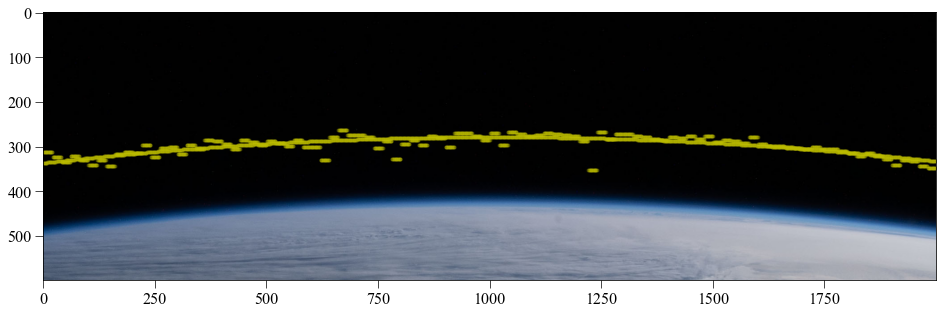

In [23]:
Obs.plot(gradient=False)

In [24]:
Obs.best_parameters

{'r': 2925740.580209873,
 'h': 419000.0,
 'f': 0.03666738396126139,
 'py': 9.232719758722628e-05,
 'y0': -0.015539072874377818,
 'theta_x': 0.86430242376085,
 'theta_z': -0.0004430023866403154,
 'origin_y': 568607.6504063732}

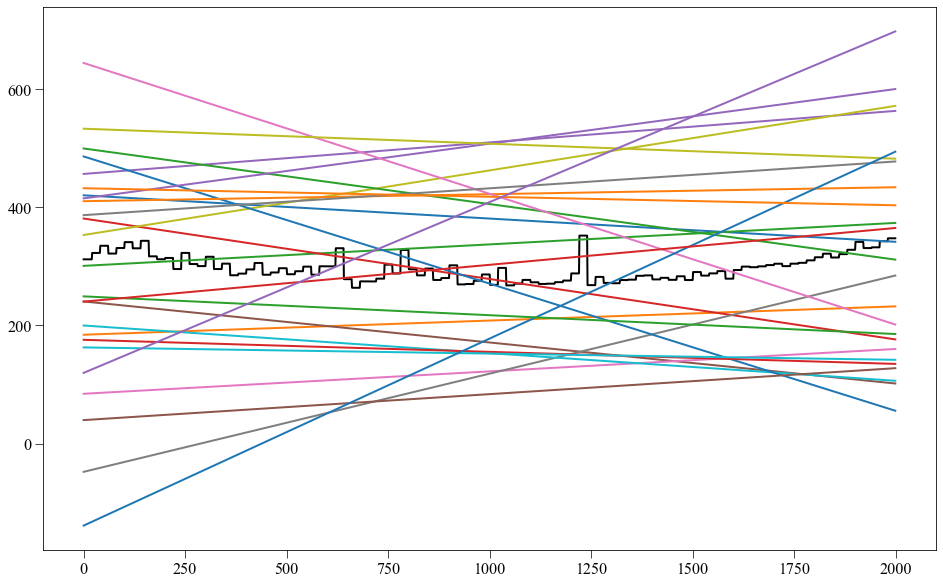

In [21]:
y = Obs.features['limb']
plt.plot(np.arange(len(y)), y, c='k')
for params in Obs.fit.accepted:
    y = Obs.fit.forward_simulate(list(params.values()), 1)[0][0]
    plt.plot(np.arange(len(y)), y)
plt.show()

In [17]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np